### Time and Space Complexity (Big O Notation)

#### Table of Contents
1. [Introduction](#introduction)
2. [Why Complexity Analysis Matters](#why-complexity-analysis-matters)
3. [Big O Notation](#big-o-notation)
4. [Common Time Complexities](#common-time-complexities)
5. [Space Complexity](#space-complexity)
6. [Analyzing Algorithms](#analyzing-algorithms)
7. [Best, Average, and Worst Case](#best-average-and-worst-case)
8. [Optimizing Algorithms](#optimizing-algorithms)
9. [Summary](#summary)

#### Learning Objectives
By the end of this notebook, you will be able to:
- Explain what time and space complexity are and why they matter
- Understand Big O notation and its significance
- Identify common time and space complexity classes
- Analyze the efficiency of algorithms using Big O
- Compare algorithms based on their complexity
- Apply optimization techniques to improve algorithm efficiency

#### 1. Introduction
When we write code to solve problems, we need to consider not just whether our solution works, but how efficiently it works. This is where algorithm analysis comes in, and specifically, the concepts of time and space complexity.
Time and space complexity help us understand and predict how our code will perform as the input size grows. They provide a standard way to compare algorithms and make informed decisions about which approach is best for a given situation.

#### 2. Why Complexity Analysis Matters 

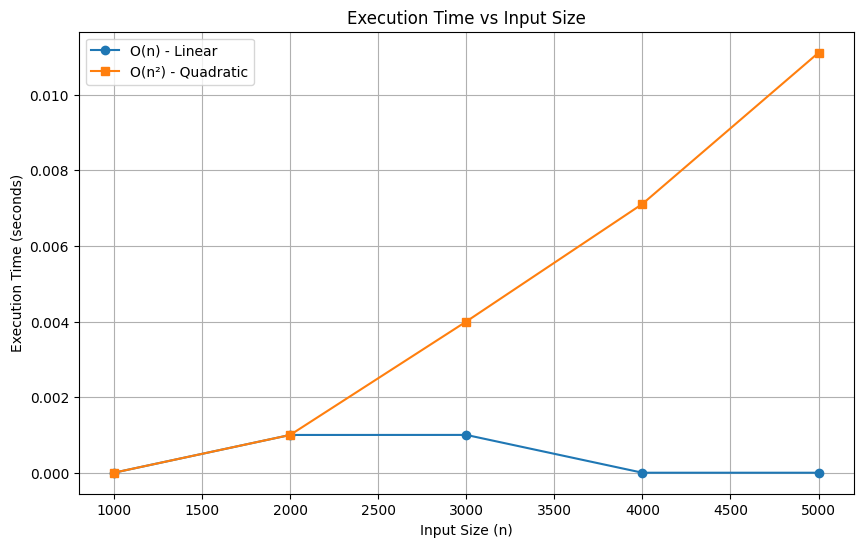

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Function with O(n) complexity
def sum_array(arr):
    total = 0
    for num in arr:
        total += num
    return total

# Function with O(n²) complexity
def pair_sum(arr):
    result = []
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            result.append(arr[i] + arr[j])
    return result

# Test with different input sizes
sizes = [1000, 2000, 3000, 4000, 5000]
linear_times = []
quadratic_times = []

for size in sizes:
    # Generate test array
    test_array = list(range(size))
    
    # Time the linear function
    start = time.time()
    sum_array(test_array)
    linear_times.append(time.time() - start)
    
    # Time the quadratic function (with smaller inputs to avoid long execution)
    if size <= 3000:  # Limit to prevent long execution
        start = time.time()
        pair_sum(test_array[:size//10])  # Use smaller input
        quadratic_times.append(time.time() - start)
    else:
        # Estimate time based on trend
        quadratic_times.append(quadratic_times[-1] * (size/sizes[len(quadratic_times)-1])**2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes[:len(linear_times)], linear_times, 'o-', label='O(n) - Linear')
plt.plot(sizes[:len(quadratic_times)], quadratic_times, 's-', label='O(n²) - Quadratic')
plt.title('Execution Time vs Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)

As we can see from the plot, execution time grows dramatically for algorithms with higher complexity as input size increases. This is why complexity analysis matters:
1. **Performance Prediction**: Understanding complexity helps predict how your algorithm will perform with larger inputs.
2. **Scalability**: It helps identify bottlenecks that might not be apparent with small test cases.
3. **Resource Planning**: It allows you to estimate the computational resources needed.
4. **Algorithm Selection:** It provides a basis for comparing different algorithms.
5. **Optimization Focus**: It helps identify which parts of your code would benefit most from optimization.

#### 3. **Big O Notation**
Big O notation is a mathematical notation that describes the limiting behavior of a function when the argument tends toward a particular value or infinity.
In computer science, it's used to classify algorithms according to how their run time or space requirements grow as the input size grows.
Key Characteristics of Big O Notation:
1. Focus on Growth Rate: Big O focuses on how the algorithm scales, not the exact number of operations.
2. Worst-Case Scenario: It typically describes the worst-case performance.
3. Dominant Terms Only: We only keep the most significant term and drop constants.

**Simplification Rules**:
1. Drop Constants: O(2n) → O(n)
2. Drop Lower-Order Terms: O(n² + n) → O(n²)
3. Consider the Worst Case: If an algorithm has different complexities in 
different scenarios, we usually use the worst-case complexity.

In [2]:
# Examples of Big O simplification

def example1(n):
    # O(3n) -> simplified to O(n)
    for i in range(n):  # O(n)
        print(i)
    
    for i in range(n):  # O(n)
        print(i*2)
    
    for i in range(n):  # O(n)
        print(i*3)

def example2(n):
    # O(n² + 2n) -> simplified to O(n²)
    for i in range(n):  # O(n)
        for j in range(n):  # O(n) * O(n) = O(n²)
            print(i, j)
    
    for i in range(n):  # O(n)
        print(i)
    
    for i in range(n):  # O(n)
        print(i*2)

def example3(n):
    # O(2^n + n²) -> simplified to O(2^n)
    # Exponential growth dominates polynomial growth
    # This is a very inefficient algorithm for large inputs!
    if n <= 1:
        return n
    return example3(n-1) + example3(n-2)  # O(2^n)

#### 4. **Common Time Complexities**
Here are the most common time complexities you'll encounter, ordered from most efficient to least efficient:
1. **O(1) - Constant Time**: Operations that take the same amount of time regardless of input size.
2. **O(log n) - Logarithmic Time**: Operations where the input size is reduced by a fraction (typically half) in each step.
3. **O(n) - Linear Time**: Operations that iterate through the input once.
4. **O(n log n) - Linearithmic Time**: Operations that are a combination of linear and logarithmic operations.
5. **O(n²) - Quadratic Time**: Operations where each element in the input requires an O(n) operation.
6. **O(2^n) - Exponential Time**: Operations where the input size grows exponentially.
7. **O(n!) - Factorial Time**: Operations where the input size grows factorially.


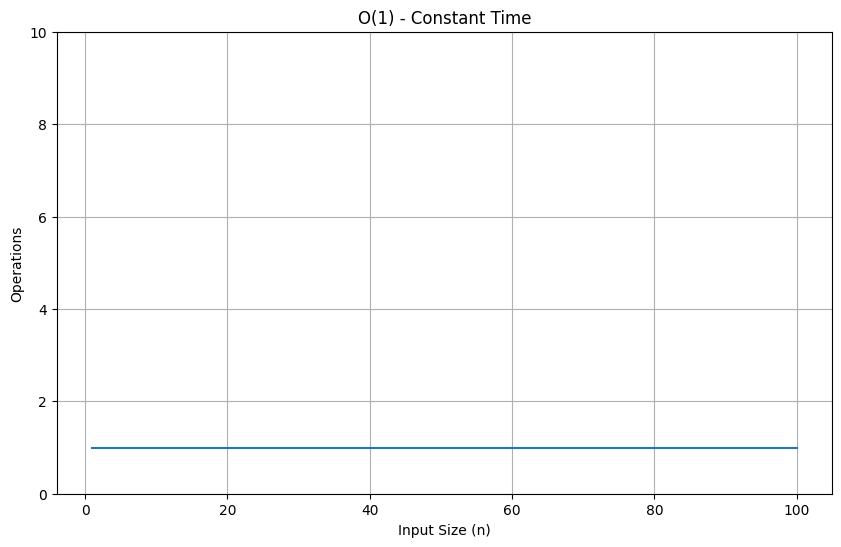

In [3]:
def constant_time_example(arr):
    """O(1) time complexity - constant time"""
    # Array access by index is O(1)
    if len(arr) > 0:
        return arr[0]
    return None

# Visualize
x = np.linspace(1, 100, 100)
y = np.ones_like(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('O(1) - Constant Time')
plt.xlabel('Input Size (n)')
plt.ylabel('Operations')
plt.ylim(0, 10)
plt.grid(True)

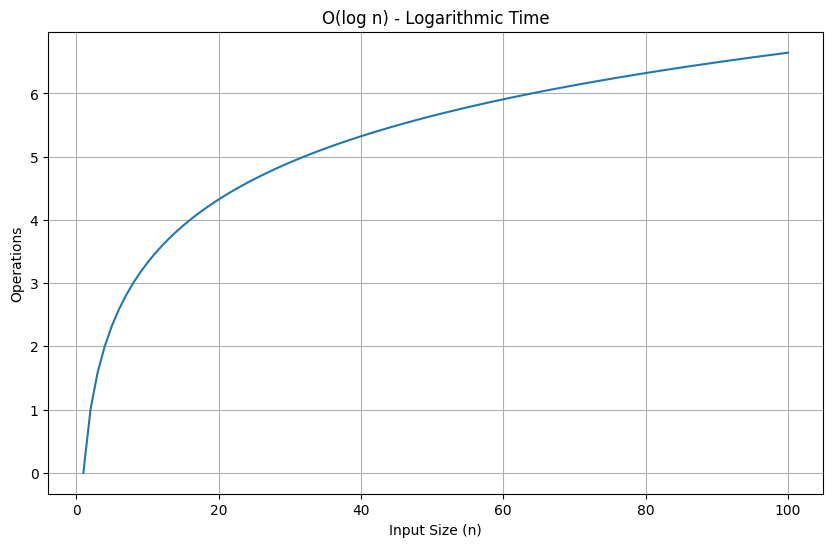

In [4]:
def binary_search(arr, target):
    """O(log n) time complexity - logarithmic time"""
    left, right = 0, len(arr) - 1
    
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
            
    return -1

# Visualize
x = np.linspace(1, 100, 100)
y = np.log2(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('O(log n) - Logarithmic Time')
plt.xlabel('Input Size (n)')
plt.ylabel('Operations')
plt.grid(True)

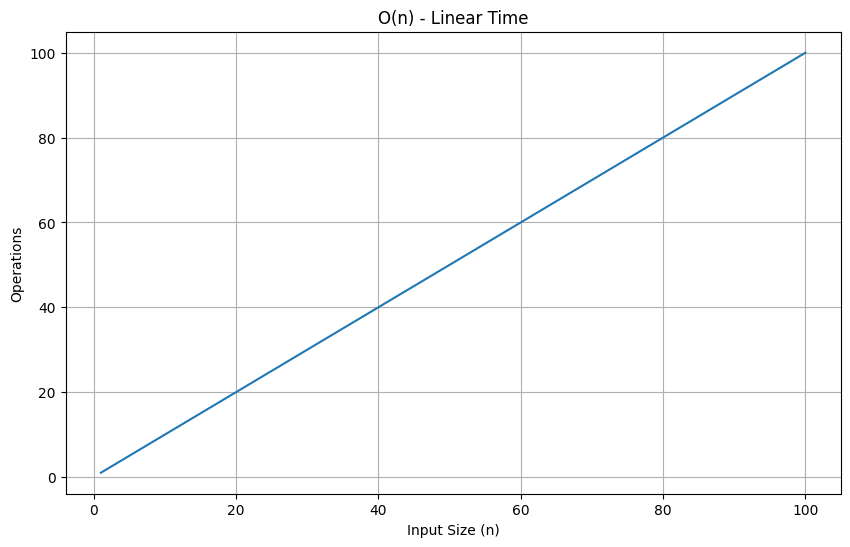

In [5]:
def linear_time_example(arr):
    """O(n) time complexity - linear time"""
    total = 0
    for num in arr:  # O(n)
        total += num
    return total

# Visualize
x = np.linspace(1, 100, 100)
y = x

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('O(n) - Linear Time')
plt.xlabel('Input Size (n)')
plt.ylabel('Operations')
plt.grid(True)

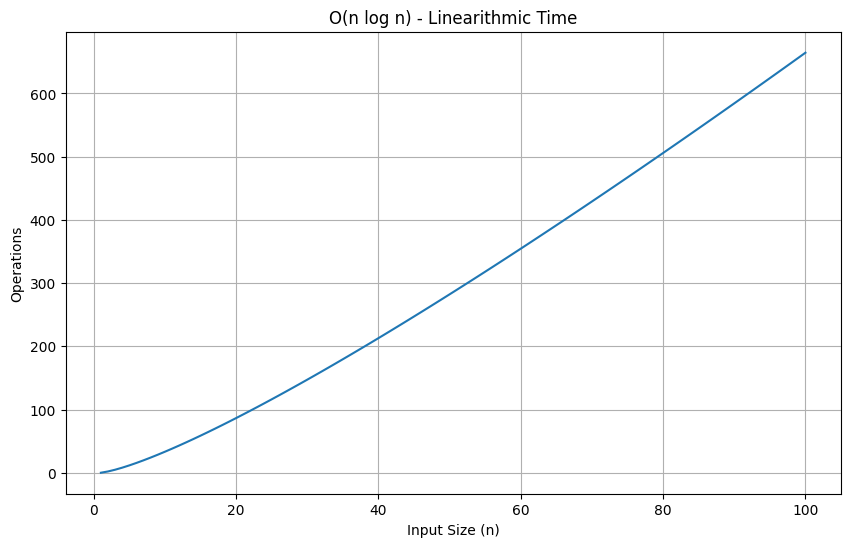

In [7]:
def merge_sort(arr):
    """O(n log n) time complexity - linearithmic time"""
    if len(arr) <= 1:
        return arr
        
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
            
    result.extend(left[i:])
    result.extend(right[j:])
    return result

# Visualize
x = np.linspace(1, 100, 100)
y = x * np.log2(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('O(n log n) - Linearithmic Time')
plt.xlabel('Input Size (n)')
plt.ylabel('Operations')
plt.grid(True)

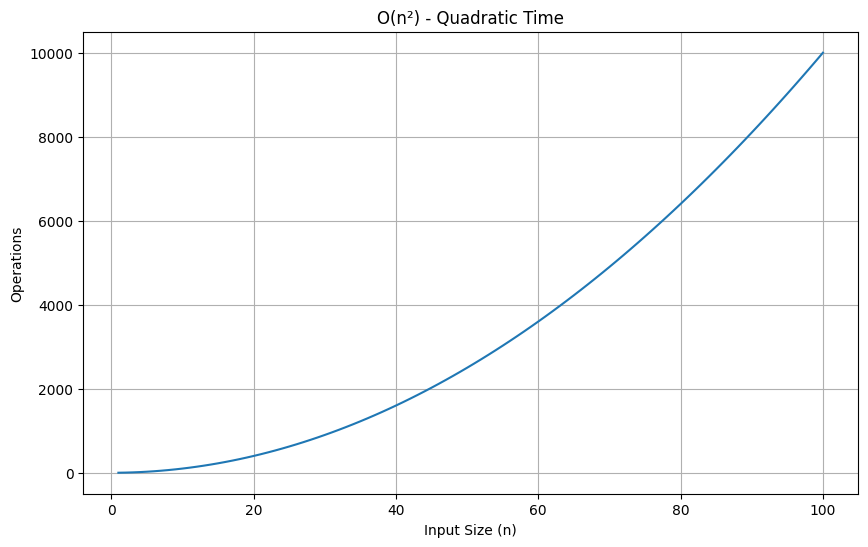

In [8]:
def quadratic_time_example(arr):
    """O(n²) time complexity - quadratic time"""
    result = []
    for i in range(len(arr)):  # O(n)
        for j in range(len(arr)):  # O(n)
            result.append(arr[i] * arr[j])
    return result

# Visualize
x = np.linspace(1, 100, 100)
y = x ** 2

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('O(n²) - Quadratic Time')
plt.xlabel('Input Size (n)')
plt.ylabel('Operations')
plt.grid(True)

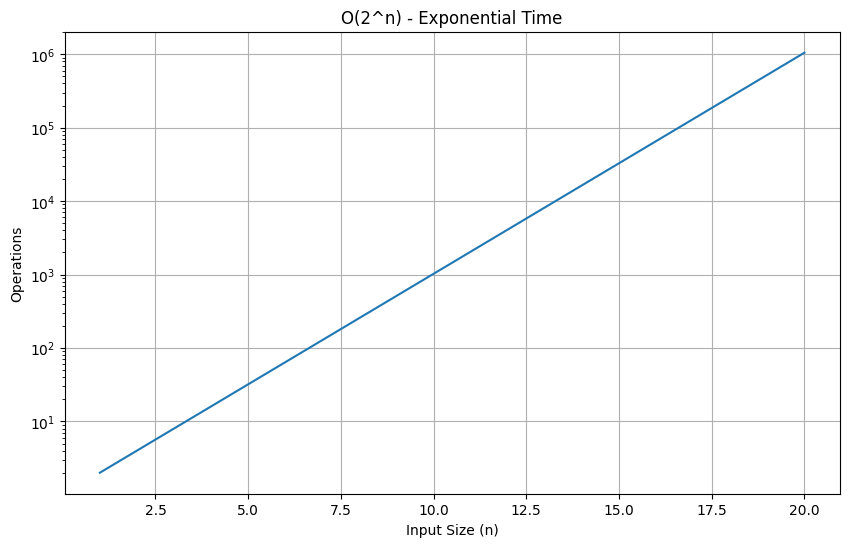

In [9]:
def fibonacci_recursive(n):
    """O(2^n) time complexity - exponential time"""
    if n <= 1:
        return n
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

# Visualize (using smaller range due to exponential growth)
x = np.linspace(1, 20, 20)
y = 2 ** x

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('O(2^n) - Exponential Time')
plt.xlabel('Input Size (n)')
plt.ylabel('Operations')
plt.yscale('log')  # Using log scale for y-axis due to rapid growth
plt.grid(True)

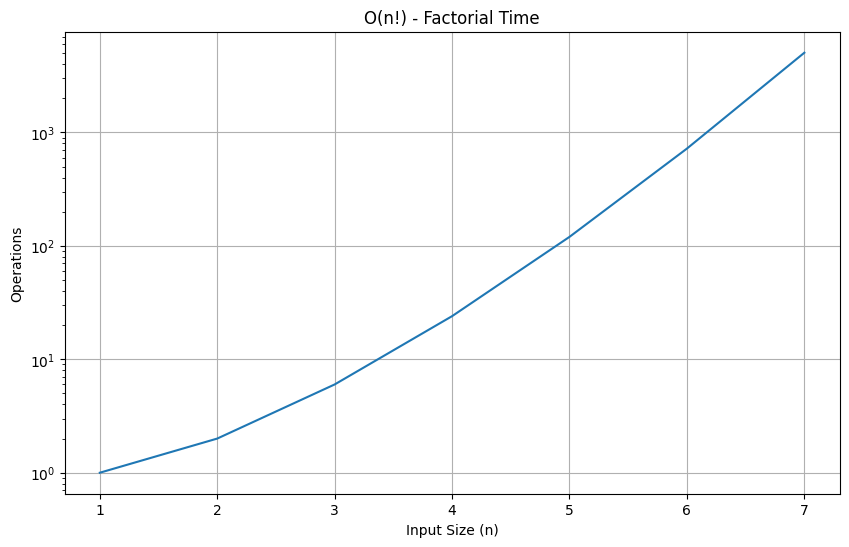

In [14]:
import numpy as np
import math
def permutations(arr):
    """O(n!) time complexity - factorial time"""
    if len(arr) <= 1:
        return [arr]
    
    result = []
    for i in range(len(arr)):
        current = arr[i]
        remaining = arr[:i] + arr[i+1:]
        
        for p in permutations(remaining):
            result.append([current] + p)
            
    return result

# Visualize (using very small range due to explosive growth)
x = np.linspace(1, 7, 7)
y = [math.factorial(int(i)) for i in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('O(n!) - Factorial Time')
plt.xlabel('Input Size (n)')
plt.ylabel('Operations')
plt.yscale('log')  # Using log scale for y-axis due to rapid growth
plt.grid(True)

(0.0, 1000.0)

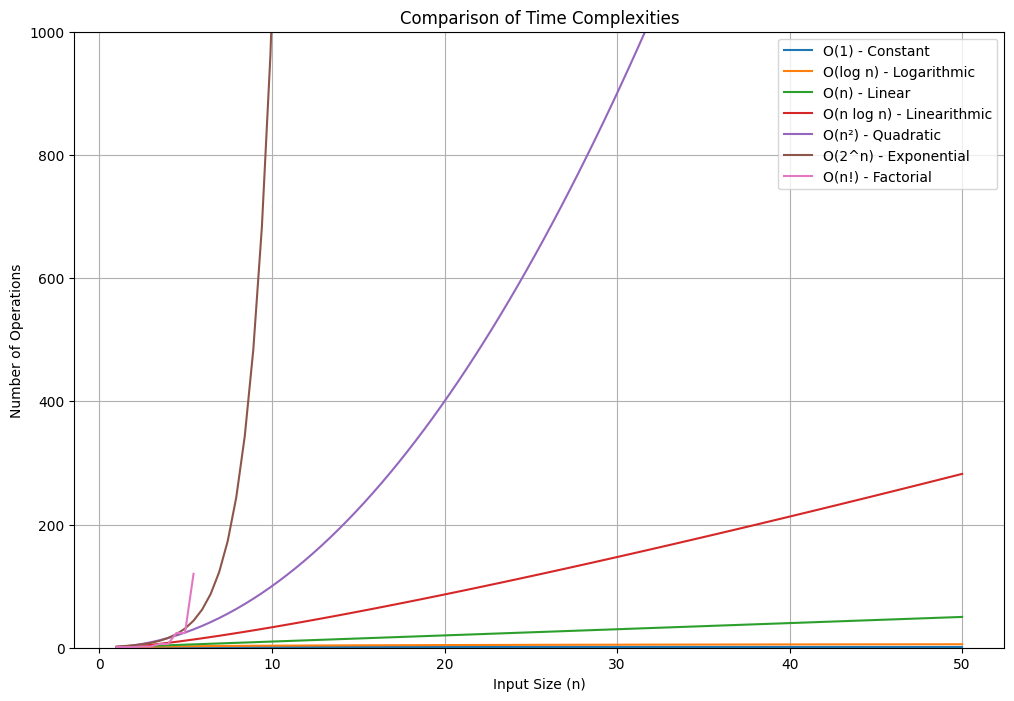

In [16]:
# Comparative visualization of different time complexities
n = np.linspace(1, 50, 100)

plt.figure(figsize=(12, 8))
plt.plot(n, np.ones_like(n), label='O(1) - Constant')
plt.plot(n, np.log2(n), label='O(log n) - Logarithmic')
plt.plot(n, n, label='O(n) - Linear')
plt.plot(n, n * np.log2(n), label='O(n log n) - Linearithmic')
plt.plot(n, n**2, label='O(n²) - Quadratic')
plt.plot(n[:30], 2**n[:30], label='O(2^n) - Exponential')
plt.plot(n[:10], [math.factorial(int(i)) for i in n[:10]], label='O(n!) - Factorial')

plt.title('Comparison of Time Complexities')
plt.xlabel('Input Size (n)')
plt.ylabel('Number of Operations')
plt.legend()
plt.grid(True)
plt.ylim(0, 1000)  # Limiting y-axis for visibility

#### 5. Space Complexity
While time complexity measures how runtime grows with input size, space complexity measures how memory usage grows. Key Aspects of Space Complexity:
1. **Input Space**: Memory needed to store the input.
2. **Auxiliary Space**: Extra memory needed by the algorithm (not including input).
3. **Total Space**: Input space + auxiliary space.
When we discuss Big O space complexity, we typically focus on auxiliary space.

In [17]:
# Examples of different space complexities

def constant_space(n):
    """O(1) space complexity - uses a fixed amount of space"""
    result = 0
    for i in range(n):
        result += i
    return result

def linear_space(n):
    """O(n) space complexity - space grows linearly with input"""
    result = []
    for i in range(n):
        result.append(i)
    return result

def quadratic_space(n):
    """O(n²) space complexity - space grows quadratically"""
    result = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(i * j)
        result.append(row)
    return result

# Example: Analyzing recursive factorial for space complexity
def factorial(n):
    """
    O(n) space complexity due to the call stack
    Each recursive call adds a frame to the call stack
    """
    if n <= 1:
        return 1
    return n * factorial(n-1)

#### Time vs Space Trade-off Example
   

In [19]:
# Example: Time-Space Tradeoff with Fibonacci

# Time-efficient but space-inefficient (memoization)
def fibonacci_memo(n, memo={}):
    """
    O(n) time complexity
    O(n) space complexity
    """
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    
    memo[n] = fibonacci_memo(n-1, memo) + fibonacci_memo(n-2, memo)
    return memo[n]

# Space-efficient but time-inefficient (iterative)
def fibonacci_iterative(n):
    """
    O(n) time complexity
    O(1) space complexity
    """
    if n <= 1:
        return n
        
    a, b = 0, 1
    for _ in range(2, n+1):
        a, b = b, a + b
    return b

# Compare performance
import time

n = 30

start = time.time()
result1 = fibonacci_memo(n)
memo_time = time.time() - start

start = time.time()
result2 = fibonacci_iterative(n)
iter_time = time.time() - start

print(f"Fibonacci({n}) = {result1}")
print(f"Memoization time: {memo_time:.6f} seconds")
print(f"Iterative time: {iter_time:.6f} seconds")

Fibonacci(30) = 832040
Memoization time: 0.000000 seconds
Iterative time: 0.000000 seconds


#### Analysing Algorithms

In [1]:
def linear_search(arr, target):
    """Find target in array and return its index, or -1 if not found"""
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

# Analysis:
# Time Complexity: O(n) - in the worst case, we might need to check every element
# Space Complexity: O(1) - we only use a fixed amount of auxiliary space

In [2]:
def nested_loops(n):
    """Function with nested loops"""
    count = 0
    for i in range(n):
        for j in range(n):
            count += 1
    return count

# Analysis:
# Time Complexity: O(n²) - the inner loop runs n times for each of the n iterations of the outer loop
# Space Complexity: O(1) - we only use a fixed amount of auxiliary space

In [3]:
def recursive_sum(n):
    """Calculate sum of numbers from 1 to n recursively"""
    if n <= 0:
        return 0
    return n + recursive_sum(n-1)

# Analysis:
# Time Complexity: O(n) - the function is called n times
# Space Complexity: O(n) - the call stack can grow to n frames

In [4]:
def mixed_complexity(arr):
    """Function with mixed operations"""
    # O(n) operation
    sum_val = sum(arr)
    
    # O(n log n) operation
    sorted_arr = sorted(arr)
    
    # O(n²) operation
    result = []
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            if arr[i] + arr[j] == sum_val:
                result.append((arr[i], arr[j]))
                
    return result

# Analysis:
# Time Complexity: O(n²) - dominated by the nested loops
# Space Complexity: O(n) - for the sorted array and the result array (in the worst case)

**Best, Average, and Worst Case**: Algorithms can have different complexities depending on the input.

**Three Common Cases**:
1. Best Case: The input results in the minimum number of operations.
2. Average Case: The expected performance across all possible inputs.
3. Worst Case: The input results in the maximum number of operations.



In [5]:
def bubble_sort(arr):
    """
    Bubble sort implementation
    Demonstrates different cases of time complexity
    """
    n = len(arr)
    # Flag to optimize best case
    swapped = False
    
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        
        # If no swapping occurred in this pass, array is sorted
        if not swapped:
            break
            
    return arr

# Best case: Already sorted array - O(n)
best_case = list(range(10))
# Average case: Random array - O(n²)
import random
avg_case = random.sample(range(100), 10)
# Worst case: Reverse sorted array - O(n²)
worst_case = list(range(10, 0, -1))

print("Best case (already sorted):", best_case)
print("Average case (random):", avg_case)
print("Worst case (reverse sorted):", worst_case)

# Time the different cases
import time

def time_sort(arr, case_name):
    arr_copy = arr.copy()  # Create a copy to preserve the original
    start = time.time()
    bubble_sort(arr_copy)
    elapsed = time.time() - start
    print(f"{case_name} took {elapsed:.8f} seconds")

time_sort(best_case, "Best case")
time_sort(avg_case, "Average case")
time_sort(worst_case, "Worst case")

Best case (already sorted): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Average case (random): [60, 61, 29, 23, 77, 43, 96, 53, 91, 79]
Worst case (reverse sorted): [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Best case took 0.00000000 seconds
Average case took 0.00000000 seconds
Worst case took 0.00000000 seconds


In Big O notation, we typically focus on the worst-case scenario, but knowing all cases helps in making informed decisions about algorithm choice.

#### **Optimizing Algorithms**
Once you understand the complexity of your algorithms, you can work on optimizing them.

##### **Common Optimization Strategies**:
1. Use Appropriate Data Structures:
 - Hash tables for O(1) lookups.
 - Balanced trees for O(log n) operations.
 - Priority queues for efficient min/max operations.


2. Avoid Nested Loops When Possible:
 - Use hash tables to eliminate nested searches.
 - Use sorting to enable more efficient algorithms.


3. Memoization and Dynamic Programming:
 - Store and reuse results of expensive operations.
 - Avoid redundant calculations.

4. Greedy Algorithms:
 - Make locally optimal choices at each step.
 - Works for certain problems with optimal substructure.

##### **Summary**:
Understanding time and space complexity is essential for writing efficient code:
1. **Big O Notation** provides a standardized way to describe algorithm efficiency.
2. **Time Complexity** measures how runtime grows with input size.
3. **Space Complexity** measures how memory usage grows with input size.
4. **Analysis** involves identifying the dominant operations and their growth rates.
5. **Optimization** comes from choosing appropriate data structures and algorithms.

Common Time Complexities (from fastest to slowest):
 - O(1): Constant Time
 - O(log n): Logarithmic Time
 - O(n): Linear Time
 - O(n log n): Linearithmic Time
 - O(n²): Quadratic Time
 - O(2^n): Exponential Time
 - O(n!): Factorial Time

Remember:
 - Focus on the dominant term (highest order)
 - Drop constants and coefficients
 - Consider worst-case scenarios
 - Balance time and space complexity

